In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Input, Flatten
from keras.datasets import mnist

Using plaidml.keras.backend backend.


In [2]:
mnist = mnist.load_data()

In [3]:
(x_train, y_train), (x_test, y_test) = mnist

In [4]:
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1],
                          x_train.shape[2], 
                          1).astype("float32")
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1],
                        x_test.shape[2], 
                        1).astype("float32")
x_train /= x_train.max()
x_test /= x_test.max()

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
input1 = Input((28, 28, 1))
conv1 = Conv2D(16, (3, 3), activation="relu", padding="same", strides=2)(input1)
#pool1 = MaxPool2D(pool_size=2)(conv1)
conv2 = Conv2D(32, (3, 3), activation="relu", padding="same", strides=2)(conv1)
#pool2 = MaxPool2D(pool_size=2)(conv2)
flat = Flatten()(conv2)
output = Dense(10, activation='softmax')(flat)

INFO:plaidml:Opening device "metal_amd_radeon_pro_555x.0"


In [7]:
model = Model(input1, output)

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                15690     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile("Adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 144us/step - loss: 0.4861 - acc: 0.8659 - val_loss: 0.2140 - val_acc: 0.9413
Epoch 2/10
48000/48000 [==============================] - 5s 97us/step - loss: 0.1733 - acc: 0.9498 - val_loss: 0.1360 - val_acc: 0.9606
Epoch 3/10
48000/48000 [==============================] - 5s 94us/step - loss: 0.1127 - acc: 0.9668 - val_loss: 0.0982 - val_acc: 0.9729
Epoch 4/10
48000/48000 [==============================] - 5s 95us/step - loss: 0.0869 - acc: 0.9741 - val_loss: 0.0900 - val_acc: 0.9747
Epoch 5/10
48000/48000 [==============================] - 5s 95us/step - loss: 0.0740 - acc: 0.9776 - val_loss: 0.0818 - val_acc: 0.9768
Epoch 6/10
48000/48000 [==============================] - 5s 96us/step - loss: 0.0642 - acc: 0.9810 - val_loss: 0.0757 - val_acc: 0.9778
Epoch 7/10
48000/48000 [==============================] - 5s 96us/step - loss: 0.0569 - acc: 0.9823 - val_loss: 0.0772 - val_ac

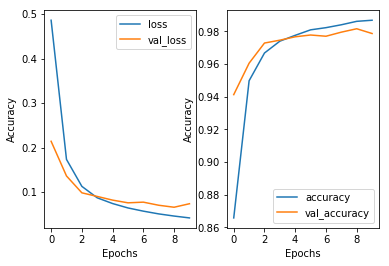

In [12]:
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend(['loss', 'val_loss'])
plt.subplot(122)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

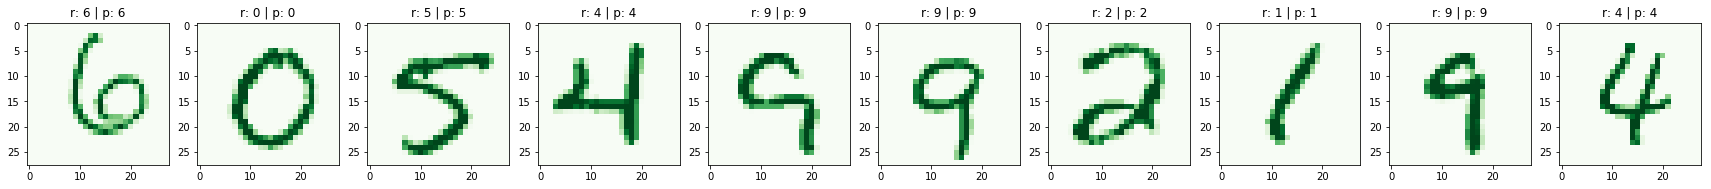

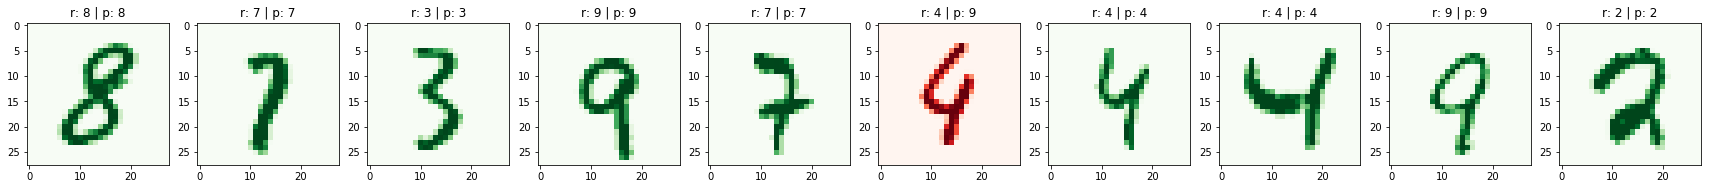

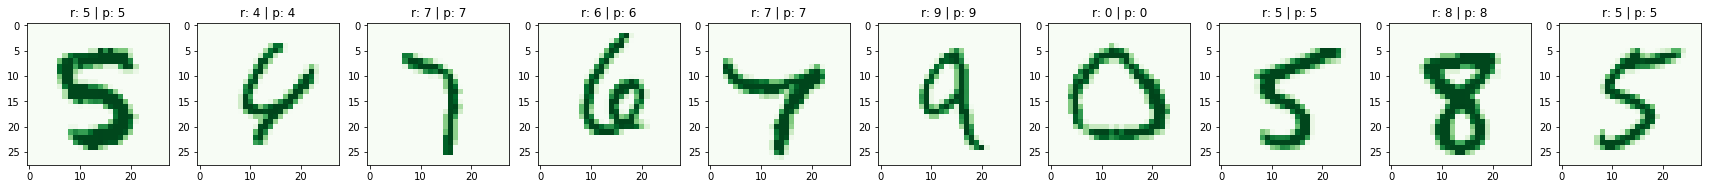

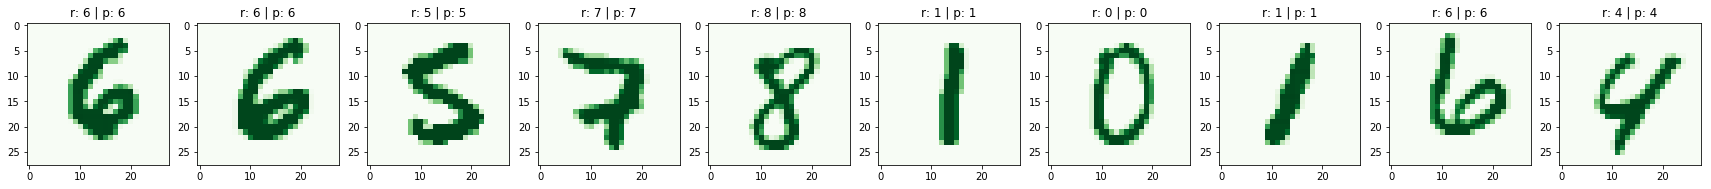

In [18]:
predict = np.argmax(model.predict(x_test), axis=1)
for x in range(10, 14):
  sub = 1
  counter = 1
  plt.figure(figsize=(30, 100))
  for i in range((x) * 10, ((x+1) * 10)):
    plt.subplot(1, 10,  counter)
    real_value = str(np.argmax(y_test[i]))
    pred_value = str(predict[i])
    cmap = "Reds" if real_value != pred_value else "Greens"
    plt.imshow(x_test[i].reshape(28,28), cmap=cmap)
    plt.title("r: " + real_value + ' | p: ' + pred_value)
    counter += 1
  plt.show()